In [27]:
from PIL import Image
import numpy as np
import os
import cv2

In [28]:
images = 'DRIVE' + os.sep + 'images'
segmented = 'DRIVE' + os.sep + 'segmented'

In [29]:
file = '12_test.tif'
# image = np.array(Image.open(images+os.sep+file))[:,:,1]
image = np.array(Image.open(images+os.sep+file))

In [30]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(image)

error: OpenCV(4.0.0) /io/opencv/modules/imgproc/src/clahe.cpp:351: error: (-215:Assertion failed) _src.type() == CV_8UC1 || _src.type() == CV_16UC1 in function 'apply'


In [31]:
Image.fromarray(cl1)

NameError: name 'cl1' is not defined

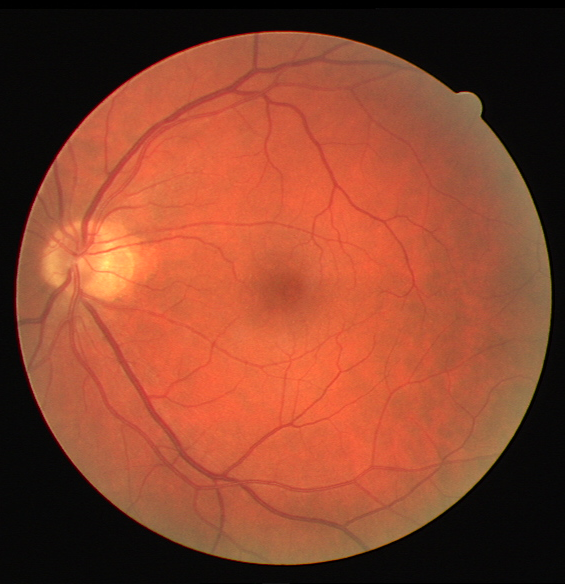

In [32]:
Image.fromarray(image)

In [33]:
blur = cv2.GaussianBlur(cl1,(25,25),4,2)

NameError: name 'cl1' is not defined

In [34]:
Image.fromarray(blur)

NameError: name 'blur' is not defined

In [35]:
b = blur.copy()
b[b<140]= 0
b[b>=140]=255

NameError: name 'blur' is not defined

In [36]:
i=image.copy()
i[b==255] = 255

NameError: name 'b' is not defined

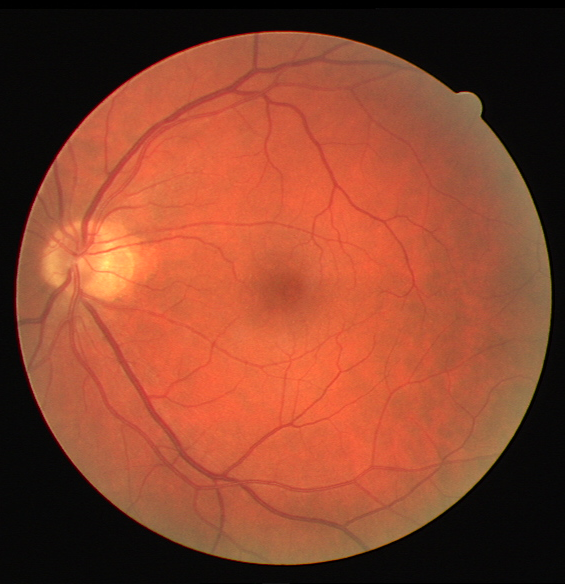

In [37]:
Image.fromarray(i)

In [38]:
# define the list of boundaries
boundaries = [
    ([150, 150, 0], [255, 255, 75])
]

In [39]:
# loop over the boundaries
for (lower, upper) in boundaries:
    # create NumPy arrays from the boundaries
    lower = np.array(lower, dtype = "uint8")
    upper = np.array(upper, dtype = "uint8")
 
    # find the colors within the specified boundaries and apply
    # the mask
    mask = cv2.inRange(image, lower, upper)
    output = cv2.bitwise_and(image, image, mask = mask)
 
    # show the images
    Image.fromarray([image, output])
    cv2.imshow("images", np.hstack([image, output]))
    cv2.waitKey(0)

AttributeError: 'list' object has no attribute '__array_interface__'

In [40]:
 python detect_color.py --image pokemon_games.png

SyntaxError: invalid syntax (<ipython-input-40-55e9594b0ce1>, line 1)